## ANOVA 1 via

Se realizará una prueba de ANOVA con el objetivo de verificar si todas las categorías de productos presentan, en promedio, el mismo nivel de ventas durante 2020.  

Para el análisis se definen como poblaciones a las distintas categorías de productos.

- **Hipótesis nula (H₀):** todas las categorías tienen la misma media de ventas.  
- **Hipótesis alternativa (H₁):** al menos una categoría difiere en su media de ventas.  


### DEPENDENCIAS

In [ ]:
%pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 3.9 MB/s eta 0:00:00


In [ ]:
%pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot
import gdown

## CARGA DEL ARCHIVO ARCHIVO Y DEFINICION DEL DATAFRAME

In [ ]:
url = "https://drive.google.com/uc?id=1zkT0jGxmGFeSkksikmF9D1qHBL8QBDZa"
output = "pet_store_records_2020.csv"
gdown.download(url, output, quiet=False)
df = pd.read_csv(output, delimiter=',')
df.head()

Downloading...
From: https://drive.google.com/uc?id=1zkT0jGxmGFeSkksikmF9D1qHBL8QBDZa
To: /content/pet_store_records_2020.csv
100%|██████████| 48.0k/48.0k [00:00<00:00, 19.7MB/s]


,product_id,product_category,sales,price,VAP,vendor_id,country,pet_size,pet_type,rating,re_buy
0,5040,Equipment,123,7293,0,VC_1605,Vietnam,small,fish,7,1
1,4567,Toys,61,9304,1,VC_1132,India,small,cat,10,0
2,4237,Toys,218,8180,0,VC_802,India,small,hamster,6,0
3,4364,Snack,69,18559,1,VC_929,India,large,dog,1,1
4,4184,Supplements,138,10283,1,VC_749,India,large,dog,10,0


##Análisis descriptivo y gráfico
Se detalla la cantidad de observaciones por grupo, así como las medias y desviaciones estándar de ventas en cada categoría.  
Además, mediante gráficos de caja y dispersión de puntos se visualiza la distribución de las observaciones, lo que permite evaluar de manera preliminar la variabilidad y posibles diferencias entre grupos antes de aplicar el ANOVA.  

In [ ]:
df.groupby('product_category').size()

,0
product_category,
Accessory,46
Bedding,46
Clothes,46
Equipment,141
Food,75
Grooming,46
Housing,46
Medicine,76
Snack,141


In [ ]:
df.groupby('product_category')['sales'].agg(['mean', 'std'])

,mean,std
product_category,,
Accessory,140.217391,64.283025
Bedding,126.543478,66.540115
Clothes,123.630435,70.801243
Equipment,118.290780,65.115342
Food,106.653333,69.735115
Grooming,126.782609,62.312800
Housing,109.086957,70.189529
Medicine,120.447368,59.539655
Snack,116.304965,65.477253


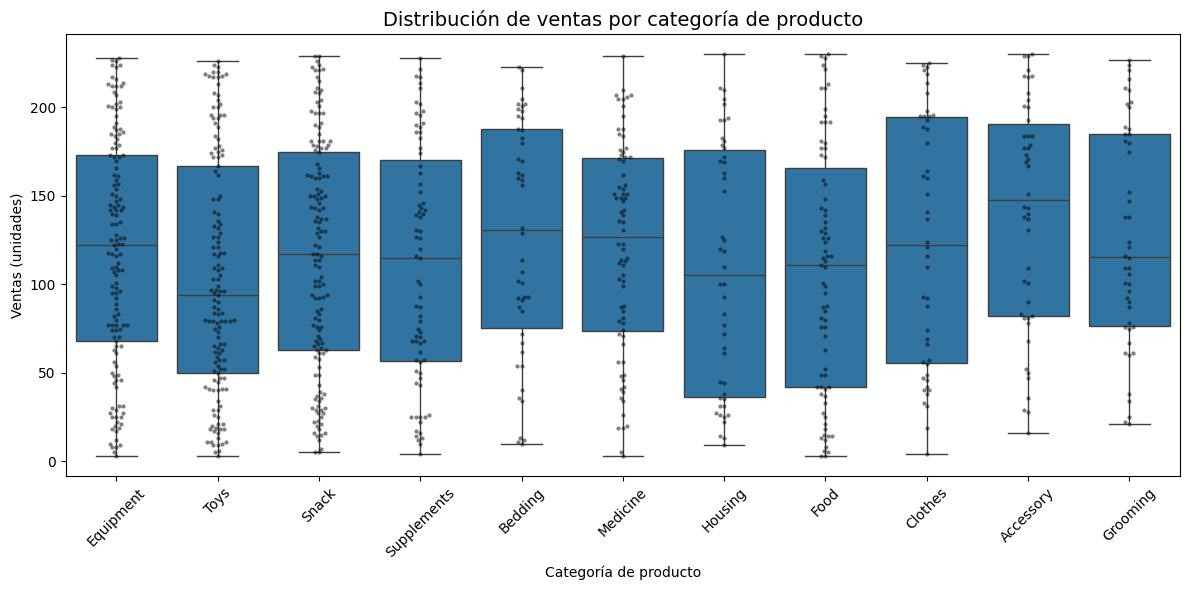

In [ ]:

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.boxplot(x="product_category", y="sales", data=df, ax=ax)

sns.swarmplot(x="product_category", y="sales", data=df,
              color='black', alpha=0.5, size=3, ax=ax)

ax.set_title("Distribución de ventas por categoría de producto", fontsize=14)
ax.set_xlabel("Categoría de producto")
ax.set_ylabel("Ventas (unidades)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Conclusiones preliminares

- Las diferentes categorías de productos presentan medias de ventas relativamente cercanas entre sí, con un rango aproximado de 104 a 140 unidades.  
- Las desviaciones estándar también resultan similares (alrededor de 60–70), lo que sugiere que las varianzas entre grupos no difieren en gran medida.  
- La visualización con boxplots y swarmplots muestra distribuciones comparables, sin que se observe de manera evidente que alguna categoría destaque de forma marcada sobre las demás.  
- El diseño es no balanceado (las categorías tienen distinto número de observaciones), por lo que resulta especialmente importante comprobar los supuestos de normalidad y homogeneidad de varianzas.  
- Con esta exploración descriptiva se da lugar para aplicar el ANOVA, que permitirá determinar estadísticamente si las diferencias en las medias de ventas entre categorías son significativas o si pueden atribuirse al azar.  


### Supuestos del ANOVA  

Por corresponderse cada fila del dataset con un producto y por no haber repetido, se asume cada caso como independiente de los otros.

Dado que todas las poblaciones definidas presentan un tamaño muestral superior a 30, por el Teorema Central del Límite se asume que la distribución de las medias de ventas en cada categoría puede considerarse aproximadamente normal.  

Sin embargo se lo verifica haciendo uso de qqplot




### verificacion de normalidad por qq plot y R2

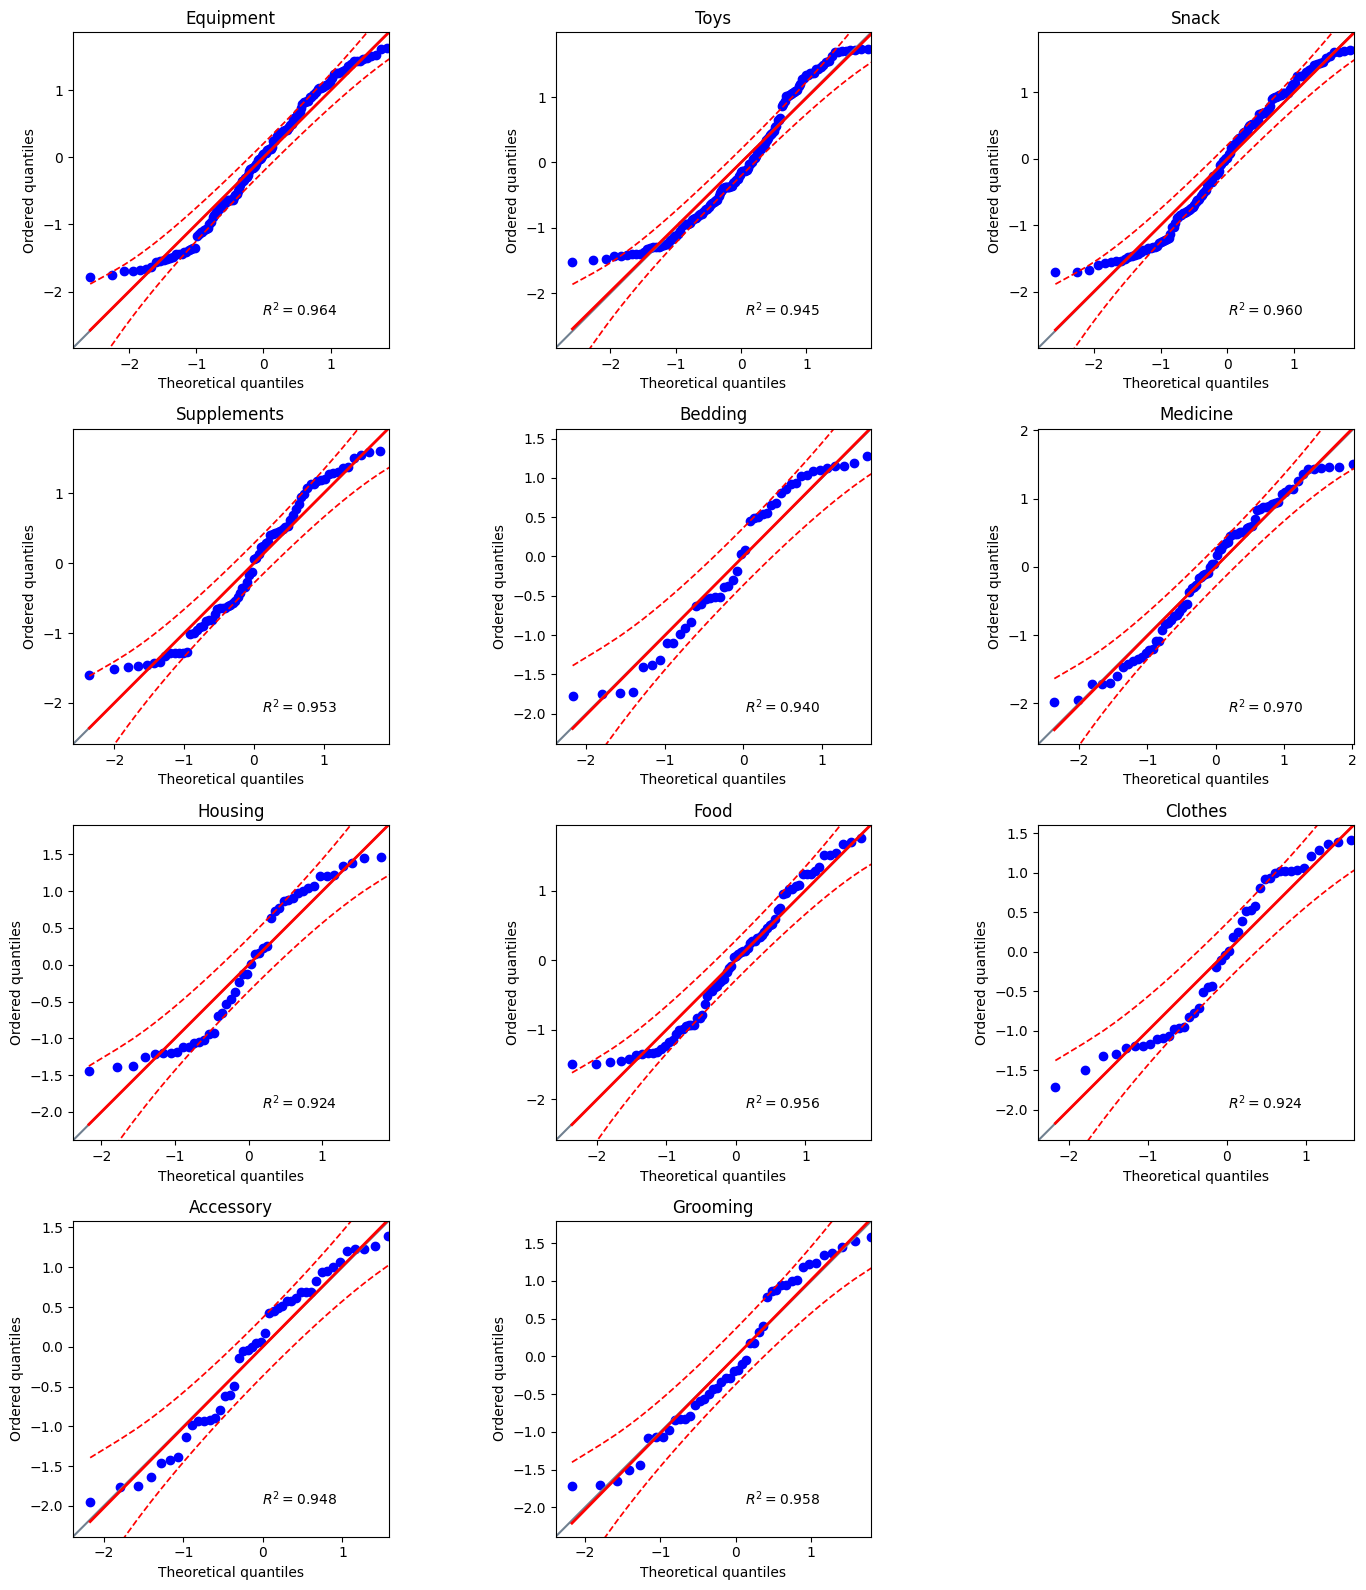

In [ ]:
# Lista de categorías
cats = df['product_category'].unique()

# Calcular cantidad de filas y columnas para el subplot
n = len(cats)
cols = 3  # cuántos gráficos por fila
rows = int(np.ceil(n / cols))

# Crear figura
fig, axs = plt.subplots(rows, cols, figsize=(15, 4*rows))

# Aplanar ejes para iterar fácilmente
axs = axs.flatten()

# Generar un qqplot por cada categoría
for i, cat in enumerate(cats):
    pg.qqplot(df.loc[df['product_category'] == cat, 'sales'], dist='norm', ax=axs[i])
    axs[i].set_title(cat)

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### verificacion de normalidad por test de hipotesis

In [ ]:
normalidad = pg.normality(data=df, dv='sales', group='product_category')
print(normalidad)

                         W      pval  normal
product_category                            
Equipment         0.957000  0.000217   False
Toys              0.936878  0.000006   False
Snack             0.952808  0.000096   False
Supplements       0.941406  0.001733   False
Bedding           0.924786  0.005507   False
Medicine          0.961914  0.022338   False
Housing           0.908740  0.001576   False
Food              0.944515  0.002523   False
Clothes           0.908348  0.001530   False
Accessory         0.934193  0.011952   False
Grooming          0.943323  0.026084   False


### resultados Test de normalidad

Los resultados de test de hipotesis indican que en todas las categorías se rechaza la hipótesis de normalidad (p < 0.05).  
Sin embargo, dado que cada grupo cuenta con más de 30 observaciones y que los QQ-plots mostraron distribuciones razonablemente alineadas con la normal, se asume que el supuesto de normalidad es suficientemente válido para la aplicación del ANOVA.  


### Homocedasticidad

In [ ]:
pg.homoscedasticity(data=df, dv='sales', group='product_category', method='levene')

,W,pval,equal_var
levene,0.769383,0.658585,True


se acepta la hipotesis nula y se cumple la condicion: las poblaciones tienen la misma varianza

##Test ANOVA

In [ ]:
anova = pg.anova(data=df, dv='sales', between='product_category', detailed=True)
print(anova)

             Source            SS   DF           MS         F     p-unc  \
0  product_category  7.266750e+04   10  7266.750297  1.665826  0.084282   
1            Within  3.786434e+06  868  4362.250760       NaN       NaN   

       np2  
0  0.01883  
1      NaN  


### Interpretación de la tabla de ANOVA

La tabla de salida del ANOVA muestra la descomposición de la variabilidad en el modelo:


#### Columnas de la tabla

- **Source:** fuente de variabilidad.  
  - `product_category`: variabilidad entre grupos (categorías de producto).  
  - `Within`: variabilidad dentro de los grupos.  

- **SS (Sum of Squares, suma de cuadrados):** cantidad de variabilidad atribuida a cada fuente.  
  - 7.27e+04 → explicada por la categoría de producto.  
  - 3.79e+06 → error residual.  

- **DF (Degrees of Freedom, grados de libertad):**  
  - 10 → número de categorías – 1 (11 – 1).  
  - 868 → total de observaciones – número de categorías (879 – 11).  

- **MS (Mean Squares, cuadrados medios):** es SS / DF.  
  Se utiliza para comparar la variabilidad entre grupos con la variabilidad dentro de los grupos.  

- **F (F-statistic):** cociente entre MS del factor y MS del error.  
  - 1.67 indica que la variabilidad entre categorías es 1.67 veces la variabilidad dentro de ellas.  

- **p-unc (p-value sin corrección):** probabilidad de obtener un F tan extremo si H₀ es cierta.  
  - 0.084 (>0.05) → no se rechaza H₀.  

- **np2 (partial eta-squared):** medida del tamaño del efecto (proporción de varianza explicada por el factor).  
  - 0.0188 (~1.9%) → efecto **pequeño**.  

#### Conclusión

- La mayor parte de la variabilidad en ventas proviene de diferencias dentro de las categorías, no entre ellas.  
- La categoría de producto explica solo el 1.9% de la varianza en ventas.  
- Como el p-value es mayor a 0.05, no se rechaza la hipótesis nula: no hay evidencia suficiente de que las medias de ventas difieran significativamente entre categorías de producto.  


En promedio, las categorías de productos se venden de forma similar.

Las pequeñas diferencias de medias no son lo suficientemente grandes ni consistentes como para decir que una categoría vende significativamente más que otra.

La categoría del producto explica solo ~1.9% de la variabilidad en ventas.

Por lo tanto, el tipo de categoría no parece ser un factor determinante de las ventas promedio.

Con los datos no hay evidencia estadística suficiente para afirmar que las medias son diferentes por lo tanto se puede asumir que todas las categorías tienen un comportamiento de ventas parecido en promedio.

El test ANOVA muestra que la categoría del producto no influye significativamente en el nivel promedio de ventas.

# ANOVA 2 vias
En este análisis se consideran dos factores: la **categoría de producto** y el **tipo de mascota**, y se estudia su efecto sobre las **ventas promedio**.  

- **Efecto principal de la categoría de producto**  
  - H₀: las medias de ventas son iguales entre todas las categorías de producto.  
  - H₁: al menos una categoría de producto presenta una media de ventas diferente.  

- **Efecto principal del tipo de mascota**  
  - H₀: las medias de ventas son iguales entre todos los tipos de mascota.  
  - H₁: al menos un tipo de mascota presenta una media de ventas diferente.  

- **Interacción entre categoría de producto y tipo de mascota**  
  - H₀: no existe interacción; el efecto de la categoría de producto sobre las ventas es independiente del tipo de mascota.  
  - H₁: existe interacción; el efecto de la categoría de producto sobre las ventas depende del tipo de mascota.  

Cada combinación única de categoría de producto × tipo de mascota constituye una población

## Análisis descriptivo y gráfico

In [ ]:
df.groupby('pet_type').size()

,0
pet_type,
bird,69
cat,347
dog,347
fish,70
hamster,23
rabbit,23


In [ ]:
df.groupby('pet_type')['sales'].agg(['mean', 'std'])

,mean,std
pet_type,,
bird,119.507246,66.470609
cat,115.933718,67.181393
dog,114.406340,66.081263
fish,121.971429,64.017428
hamster,97.608696,71.123925
rabbit,134.347826,57.342360


In [ ]:
# Tabla de medias
tabla_mean = df.pivot_table(values="sales",
                            index="product_category",
                            columns="pet_type",
                            aggfunc="mean")

# Tabla de desviaciones estándar
tabla_std = df.pivot_table(values="sales",
                           index="product_category",
                           columns="pet_type",
                           aggfunc="std")

print("Medias por categoría y tipo de mascota:")
display(tabla_mean)

print("Desviaciones estándar por categoría y tipo de mascota:")
display(tabla_std)

Medias por categoría y tipo de mascota:


pet_type,bird,cat,dog,fish,hamster,rabbit
product_category,,,,,,
Accessory,186.000000,135.833333,138.210526,116.000000,169.000000,160.5
Bedding,42.000000,129.210526,127.578947,136.500000,117.000000,175.5
Clothes,180.000000,113.052632,131.631579,176.500000,95.000000,67.5
Equipment,125.166667,119.254902,113.921569,129.529412,36.500000,129.5
Food,75.333333,125.909091,90.636364,38.500000,145.500000,129.5
Grooming,177.000000,124.631579,121.944444,107.000000,43.000000,205.0
Housing,110.000000,94.526316,119.894737,102.000000,117.500000,142.5
Medicine,91.000000,128.941176,114.823529,172.000000,37.500000,132.5
Snack,126.529412,110.540000,121.176471,117.055556,68.666667,114.0


Desviaciones estándar por categoría y tipo de mascota:


pet_type,bird,cat,dog,fish,hamster,rabbit
product_category,,,,,,
Accessory,49.497475,54.445061,80.542314,58.898217,2.828427,23.334524
Bedding,42.426407,64.417543,65.382053,61.518290,147.078210,27.577164
Clothes,22.627417,79.433742,67.354956,23.334524,36.769553,68.589358
Equipment,66.934779,63.459229,63.242025,76.611942,27.577164,61.518290
Food,57.735027,75.562625,61.028077,45.961941,92.630988,60.104076
Grooming,35.355339,63.173668,59.072709,43.840620,25.455844,22.605309
Housing,117.379726,74.949145,66.721556,82.024387,64.346717,84.145707
Medicine,16.970563,63.933650,56.188789,22.627417,26.162951,26.162951
Snack,68.007461,69.131112,65.487008,61.199262,8.736895,48.083261


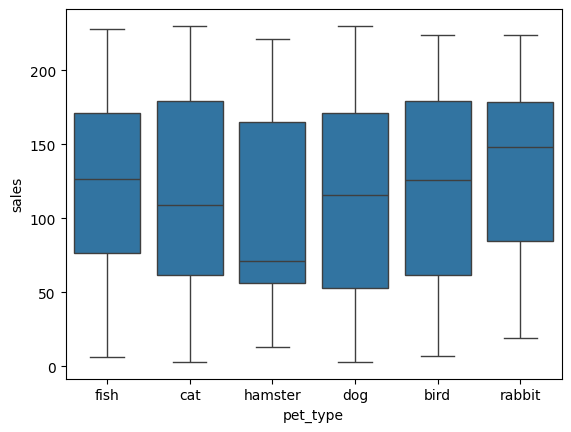

In [ ]:
df.groupby("pet_type")["sales"].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="pet_type", y="sales", data=df)
plt.show()

## Test de anova

In [ ]:
pg.anova(
    data     = df,
    dv       = 'sales',
    between  = ['product_category', 'pet_type'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,product_category,7.488322e+04,10.0,7488.3222,1.7099,0.0743,0.0206
1,pet_type,2.195781e+04,5.0,4391.5630,1.0028,0.4149,0.0061
2,product_category * pet_type,2.039969e+05,50.0,4079.9385,0.9316,0.6098,0.0542
3,Residual,3.560479e+06,813.0,4379.4329,NaN,NaN,NaN


###Efecto de pet_type:


F = 1.00, p = 0.4149

*No es significativo.*

Tamaño del efecto extremadamente pequeño (η² parcial = 0.0061), casi no aporta a explicar la variación en ventas.


###Interacción product_category * pet_type:

F = 0.93, p = 0.6098

La interacción tampoco es significativa.

η² parcial = 0.0542, efecto pequeño.

Residual:

La mayor parte de la variación está en el residual (MS = 4,379.43), lo que indica que las diferencias en ventas no se explican bien por estos factores.

#CORRELACION


Nos interesa investigar si existe correlacion entre el precio de los productos y las ventas.

## Dispersion de datos

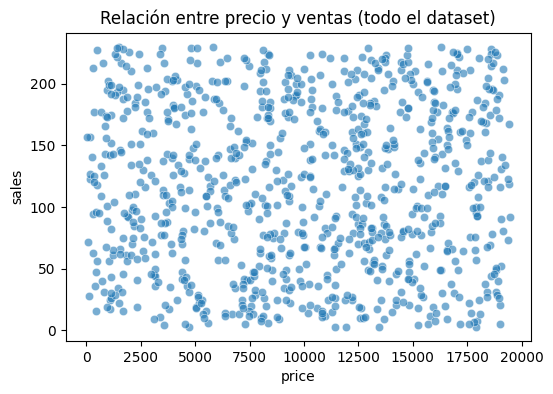

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="price", y="sales", alpha=0.6)
plt.title("Relación entre precio y ventas (todo el dataset)")
plt.show()

El grafico no sugiere que haya una correlacion entre las variables pero por la naturaleza y origen de las mismas sospechamos que si deberia tenerla.
Para ahondar en este analisis optamos filtrar el data set segun la variable categoria y repetir el analisis


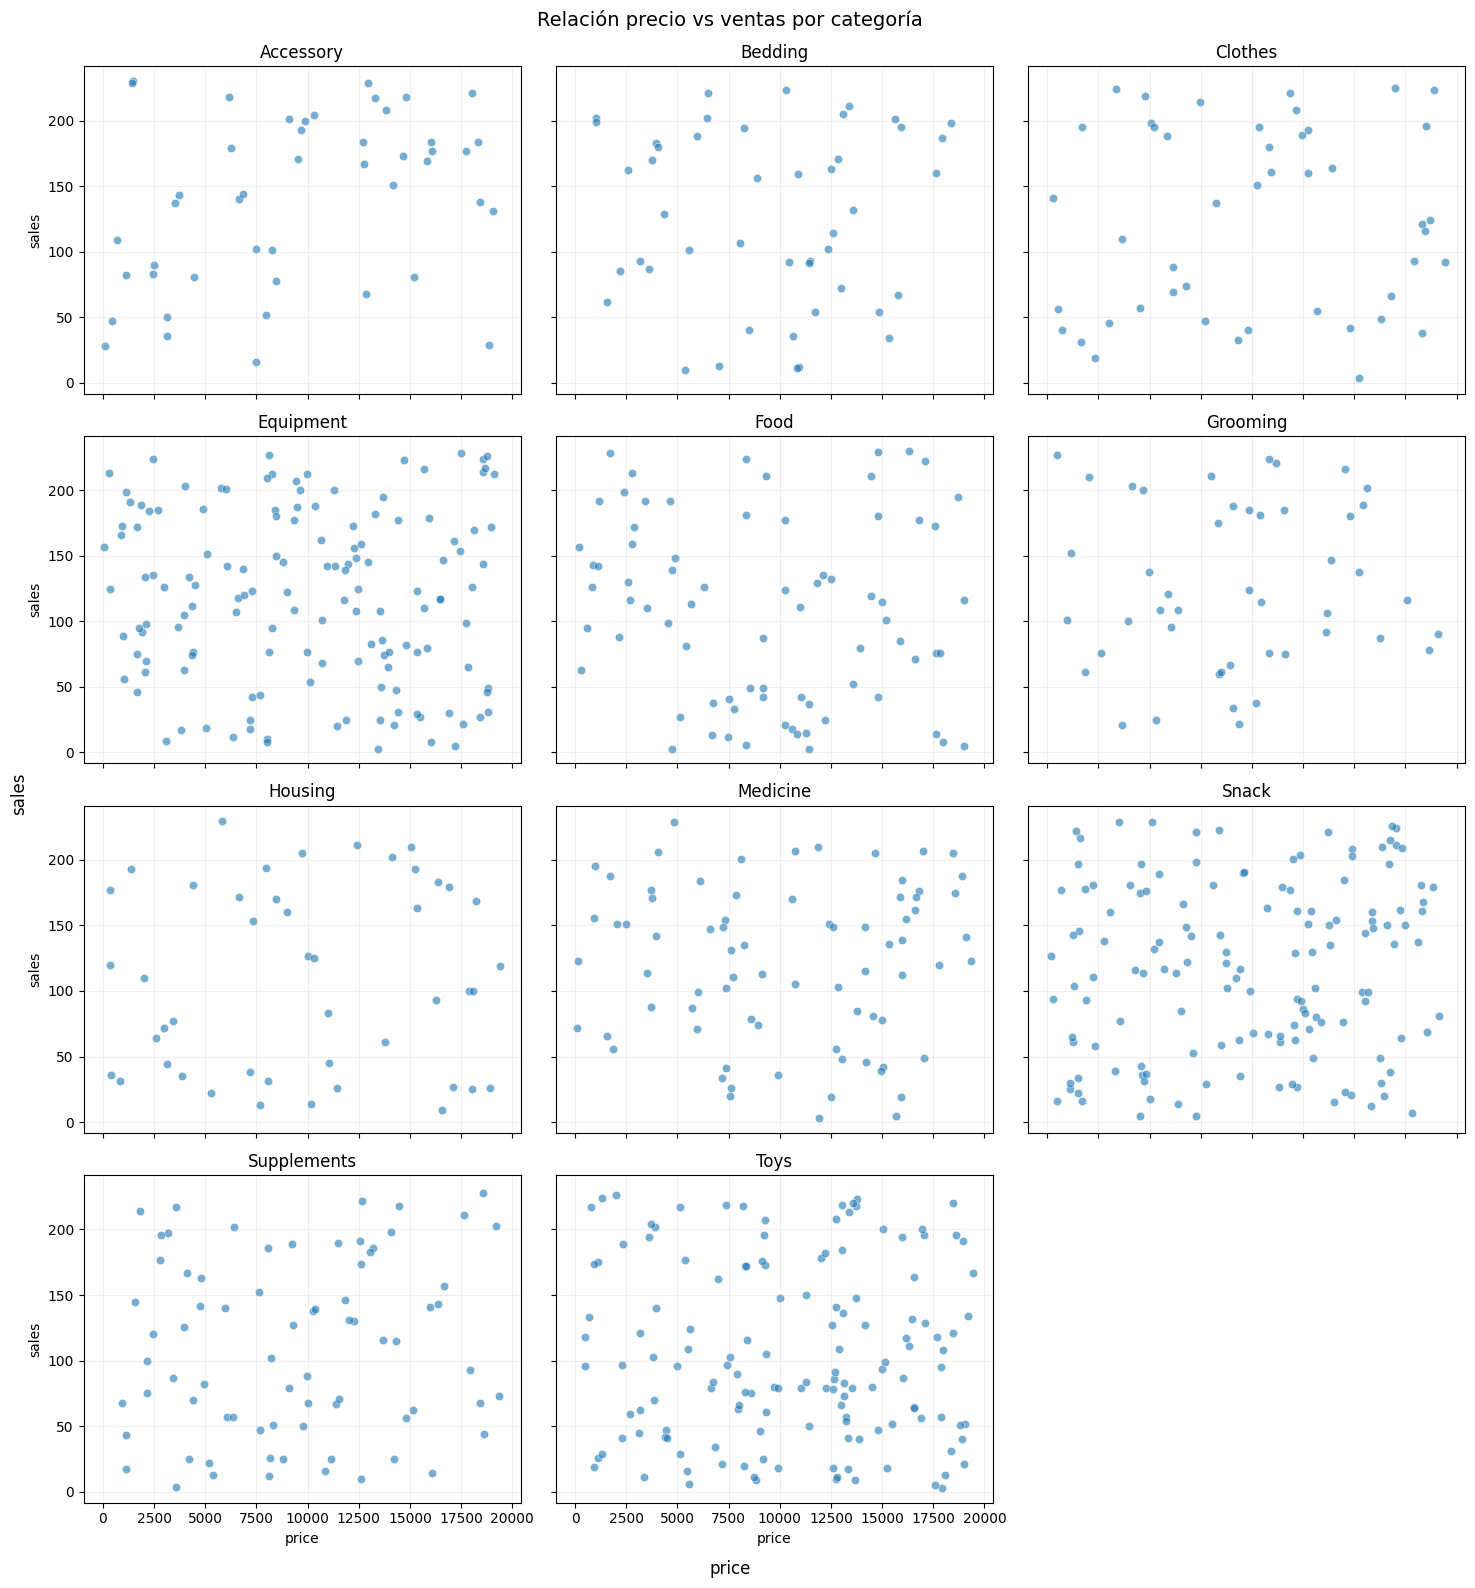

In [ ]:

cats = sorted(df['product_category'].unique())  # <- acá nace "cats"


cols = 3
rows = int(np.ceil(len(cats) / cols))
fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharex=True, sharey=True)


axs = np.atleast_2d(axs)
axs_flat = axs.flatten()


for i, cat in enumerate(cats):
    subset = df[df['product_category'] == cat]
    sns.scatterplot(data=subset, x="price", y="sales", alpha=0.6, ax=axs_flat[i])
    axs_flat[i].set_title(cat)
    axs_flat[i].grid(True, alpha=0.2)


for j in range(i+1, rows*cols):
    fig.delaxes(axs_flat[j])


fig.suptitle("Relación precio vs ventas por categoría", fontsize=14, y=0.99)
fig.supxlabel("price")
fig.supylabel("sales")
plt.tight_layout()
plt.show()

los gráficos de dispersión individuales por categoría tampoco evidencian una relación aparente entre `price` y `sales`.  

En consecuencia, el análisis exploratorio indica que no existe una asociación evidente entre precio y ventas en este dataset.  
Esto puede deberse a limitaciones del conjunto de datos, falta de variabilidad real en las observaciones, o a que otros factores resulten más determinantes que el precio a la hora de explicar las ventas.  

## Analisis de correlacion

Para evaluar la relación entre las variables `price` y `sales` se optó por utilizar el coeficiente de correlación de Pearson.  
La elección se fundamenta en que ambas variables son cuantitativas continuas.  

Como complemento, se calcularon también correlaciones no paramétricas (Spearman y Kendall) que permiten contrastar los hallazgos obtenidos con Pearson.

In [ ]:
print('Correlación Pearson: ', df['sales'].corr(df['price'], method='pearson'))
print('Correlación Spearman: ', df['sales'].corr(df['price'], method='spearman'))
print('Correlación Kendall: ', df['sales'].corr(df['price'], method='kendall'))

Correlación Pearson:  0.02296795215015154
Correlación Spearman:  0.02519277479054883
Correlación Kendall:  0.01747361747624886


In [ ]:
from scipy import stats
# Pearson
r, p = stats.pearsonr(df['sales'], df['price'])
print(f"Correlación Pearson: r={r:.3f}, p-value={p:.4f}")

# Spearman
r, p = stats.spearmanr(df['sales'], df['price'])
print(f"Correlación Spearman: r={r:.3f}, p-value={p:.4f}")

# Kendall
r, p = stats.kendalltau(df['sales'], df['price'])
print(f"Correlación Kendall: r={r:.3f}, p-value={p:.4f}")

Correlación Pearson: r=0.023, p-value=0.4965
Correlación Spearman: r=0.025, p-value=0.4557
Correlación Kendall: r=0.017, p-value=0.4390


In [ ]:
Los coeficientes de correlación (Pearson, Spearman y Kendall) fueron cercanos a cero y no resultaron significativos (p > 0.05).
Esto indica que no existe evidencia de relación entre `price` y `sales` en el dataset.

## Matriz de correlacion

           sales     price    rating
sales   1.000000  0.025193  0.006293
price   0.025193  1.000000  0.057883
rating  0.006293  0.057883  1.000000


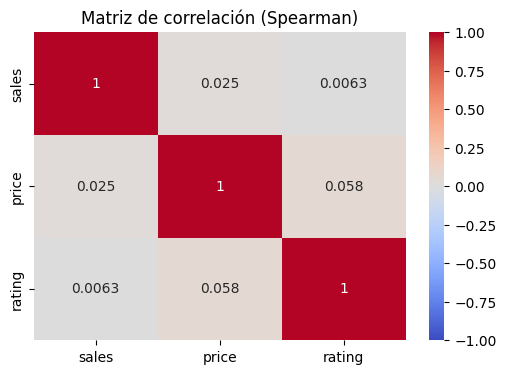

In [ ]:
# Seleccionar variables numéricas relevantes
num_vars = ['sales', 'price', 'rating']

# Calcular matriz de correlación (Spearman recomendado)
corr_matrix = df[num_vars].corr(method='spearman')

# Mostrar matriz
print(corr_matrix)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de correlación (Spearman)")
plt.show()

## Conclusion del analisis de correlacion

Los coeficientes de correlación fueron cercanos a cero y no resultaron significativos (p > 0.05).  
Esto indica que no existe evidencia de relación entre `price` y `sales` en el dataset.  

## Conclusión general

Durante el análisis encontramos resultados que no tienen sentido práctico en la vida real.  
Ni el ANOVA ni la correlación mostraron diferencias o relaciones esperadas, y eso va en contra de lo que uno esperaría en un escenario real de ventas.  

Por la uniformidad de los datos y estos resultados contraintuitivos,sospechamos que, a diferencia de lo que indica la fuente, el dataset no refleja información real, sino que probablemente se trate de datos ficticios o generados de manera artificial.  
Esto limita bastante las conclusiones que se pueden sacar, más allá del ejercicio estadístico en sí.